<a href="https://colab.research.google.com/github/RupeshSharma14/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [ ]:
matplotlib.rcParams['font.size'] = 12
# matplotlib.rcParams['figure.figsize'] = (8, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

bank_df = pd.read_csv("/content/drive/MyDrive/Bank Marketing Effectiveness Prediction/bank-full.csv", sep = ";")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank_df.shape

(45211, 17)

In [ ]:
# Checking for the null values

bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# Checking for duplicate rows in the dataset

bank_df.duplicated().sum()

0

In [ ]:
# Basic statistics about the dataset

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Checking the data types of columns

bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# Renaming few columns for better understanding

bank_df.rename(columns = {"job": "job_type", "marital": "marital_status", "housing": "housing_loan", "loan": "personal_loan",
                            "contact": "contact_type","campaign": "contact_campaign", "day": "last_date", "month": "last_month",
                            "pdays": "prev_campaign_gap", "previous": "before_campaign_contact","poutcome": "prev_outcome",
                            "y": "subscribed"}, inplace = True)
bank_df.columns

Index(['age', 'job_type', 'marital_status', 'education', 'default', 'balance',
       'housing_loan', 'personal_loan', 'contact_type', 'last_date',
       'last_month', 'duration', 'contact_campaign', 'prev_campaign_gap',
       'before_campaign_contact', 'prev_outcome', 'subscribed'],
      dtype='object')

In [ ]:
numeric_cols =  bank_df.describe().columns
numeric_cols

Index(['age', 'balance', 'last_date', 'duration', 'contact_campaign',
       'prev_campaign_gap', 'before_campaign_contact'],
      dtype='object')

In [ ]:
categorical_cols = bank_df.describe(include = "O").columns
categorical_cols

Index(['job_type', 'marital_status', 'education', 'default', 'housing_loan',
       'personal_loan', 'contact_type', 'last_month', 'prev_outcome',
       'subscribed'],
      dtype='object')

In [ ]:
for cat in categorical_cols:
  print(f"{cat} - {bank_df[cat].unique()}")

job_type - ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital_status - ['married' 'single' 'divorced']
education - ['tertiary' 'secondary' 'unknown' 'primary']
default - ['no' 'yes']
housing_loan - ['yes' 'no']
personal_loan - ['no' 'yes']
contact_type - ['unknown' 'cellular' 'telephone']
last_month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome - ['unknown' 'failure' 'other' 'success']
subscribed - ['no' 'yes']


In [ ]:
# Converting secs into minutes

bank_df["duration"] = bank_df["duration"].apply(lambda x: x/60).round(2)

# **Exploratory Data Analysis**

### **Univariate Analysis**

**1. Distribution of target label**

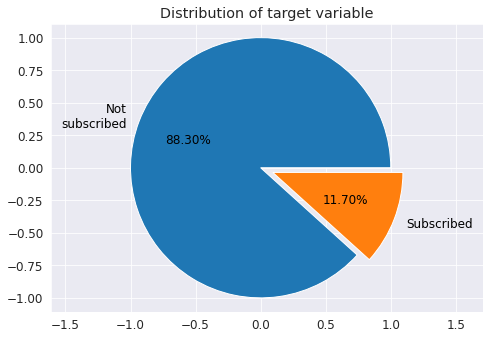

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.pie(bank_df["subscribed"].value_counts(), labels = ["Not\nsubscribed", "Subscribed"],
        explode = (0, 0.1), autopct = "%1.2f%%", frame = True, textprops = dict(color = "black", size = 12))

ax.axis("equal")
plt.title("Distribution of target variable")

plt.show()

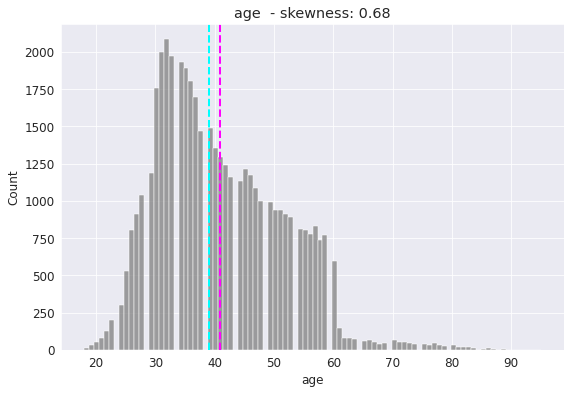

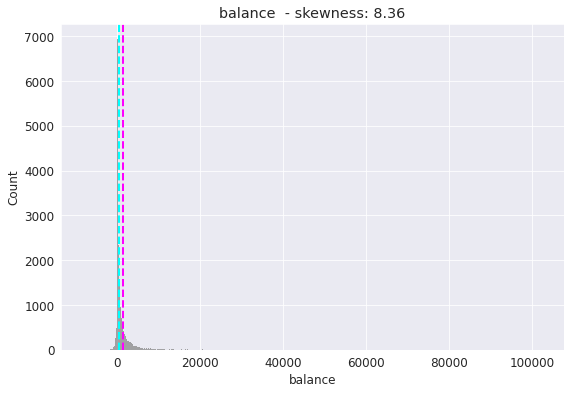

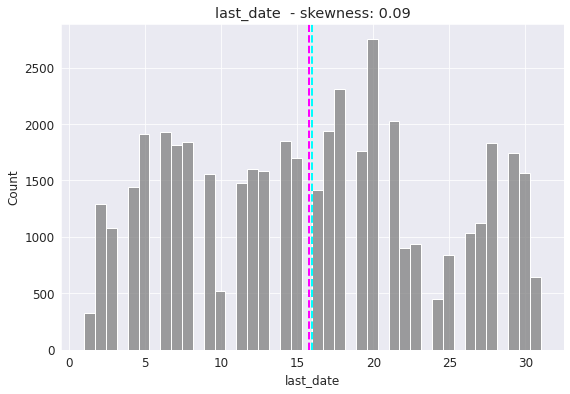

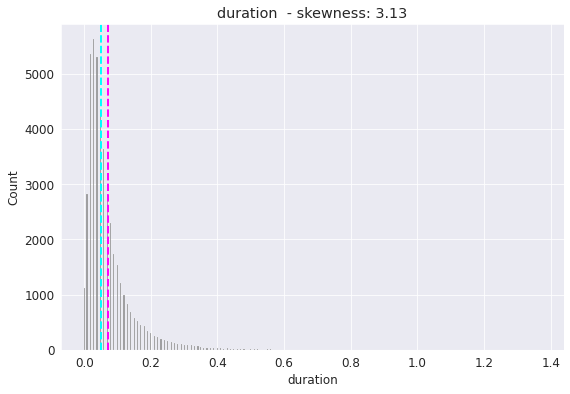

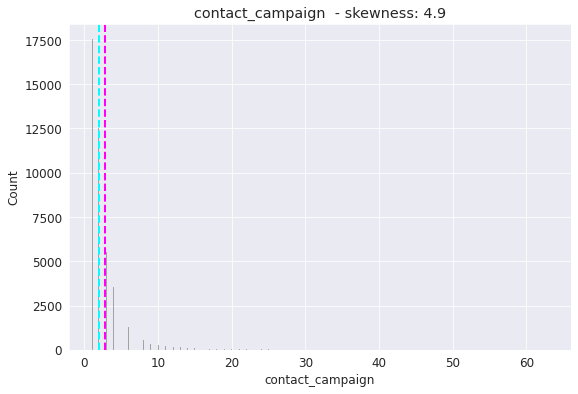

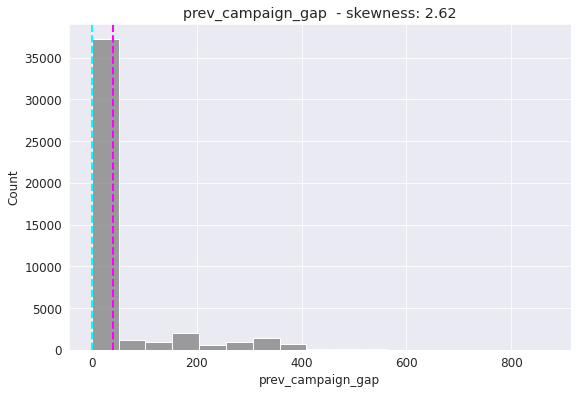

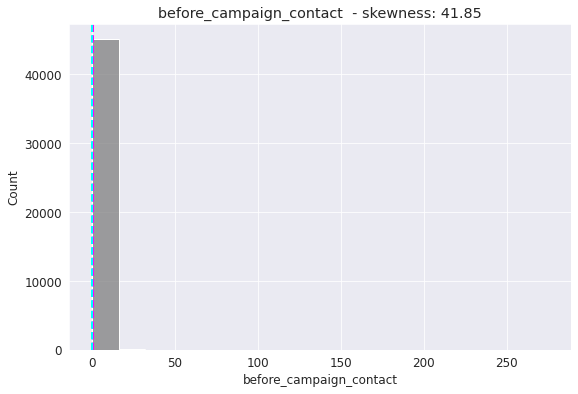

In [ ]:
# Distribution of numeric_features

for col in numeric_cols:
  fig = plt.figure(figsize = (9, 6))
  ax = fig.gca()
  feature = bank_df[col]
  sns.histplot(feature, ax = ax, color = "grey")
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col + "  - skewness: " + str(round(feature.skew(), 2))) 

plt.show()

In [ ]:
bank_df[numeric_cols].skew()

age                         0.684818
balance                     8.360308
last_date                   0.093079
duration                    3.132938
contact_campaign            4.898650
prev_campaign_gap           2.615715
before_campaign_contact    41.846454
dtype: float64